Customer Lifetime Value (CLV) Prediction using PyCaret


In this notebook, we leverage PyCaret, a powerful machine learning library, to predict Customer Lifetime Value (CLV), defined here as the gross margin for the last year. The goal is to build a robust model that accurately estimates the total gross margin a customer is expected to generate over the previous year based on their past purchasing behavior .

Key Steps:


*   Model Setup: We use PyCaret's regression module to set up an environment for predicting continuous values (gross margin for the last year).

*   Model Comparison: We compare multiple regression models to find the best-performing model based on WMAPE (Weighted Mean Absolute Percentage Error), a metric used for evaluating accuracy in business contexts.
*  Error Analysis: To further understand model performance, we bin customers based on their gross margin (GM) and calculate the WMAPE for each bin. This helps identify how well the model performs across different customer segments and provides insights into areas of improvement.

*   Interpretation: The model’s performance is evaluated to ensure it can generalize well on unseen customer data, and we analyze results for key insights.


This notebook serves as a comprehensive guide to predicting CLV using state-of-the-art machine learning techniques, with PyCaret providing a streamlined approach to model selection, evaluation, and error analysis.

# Install Libraries

In [ ]:
!pip install pycaret

In [ ]:
!pip install pycaret[analysis]

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd

from pycaret.regression import *

import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
# Read the CSV file
featuer_df = pd.read_csv('Feature_Engineering_CLV.csv', low_memory=False)


# Display the DataFrame
featuer_df.head(10)

,Unnamed: 0,CompanyCustomerKey,avg_order_value,order_count,avg_days_between_orders,days_since_last_order,unique_product_count,most_frequent_product_NAICSCode,product_variety_score,high_value_product_count,...,sum_gm_2016,sum_gm_2024,time_to_first_purchase,total_spend_in_early_purchases,early_repeat_purchase,total_gross_margin,frequency,recency,T,monetary_value
0,1,10582379,16.820458,33.0,95.0,30.0,12.0,333120.0,0.363636,16.0,...,493.78,444.00,-3045,116.46,True,2203.48,31.0,3045.0,3075.0,70.594194
1,2,11098756,9.322858,66.0,5.0,2.0,165.0,238910.0,2.500000,121.0,...,0.00,2546.69,-1299,383.73,True,10078.01,56.0,1299.0,1301.0,144.430179
2,3,11133877,28.448065,7.0,103.0,571.0,6.0,237120.0,0.857143,7.0,...,0.00,0.00,-722,1989.00,True,3527.56,6.0,722.0,1293.0,263.846667
3,4,11194873,42.770645,8.0,177.0,61.0,1.0,532490.0,0.125000,8.0,...,0.00,293.88,-1240,478.13,True,1325.89,6.0,1240.0,1301.0,186.643333
4,5,11346248,8.888966,31.0,13.0,121.0,40.0,423840.0,1.290323,60.0,...,0.00,3706.40,-1068,96.17,True,26053.56,28.0,1068.0,1189.0,914.503214
5,6,11346304,35.845124,10.0,143.0,55.0,14.0,811219.0,1.400000,18.0,...,62.21,963.72,-2730,181.55,True,4337.26,7.0,2730.0,2785.0,610.721429
6,7,11346395,17.416722,16.0,30.0,681.0,47.0,333999.0,2.937500,23.0,...,0.00,0.00,-1619,32.41,True,6270.02,13.0,1619.0,2300.0,449.808462
7,8,11346410,30.097333,2.0,243.0,314.0,6.0,424130.0,3.000000,5.0,...,0.00,0.00,-1215,150.56,True,902.92,1.0,1215.0,1529.0,682.340000
8,9,11346467,33.980909,3.0,247.0,696.0,4.0,423830.0,1.333333,5.0,...,0.00,0.00,-989,230.68,True,373.79,2.0,989.0,1685.0,170.440000
9,10,11346604,3.653528,36.0,51.0,87.0,7.0,336212.0,0.194444,48.0,...,1097.51,796.72,-3005,139.22,True,6441.17,34.0,3005.0,3092.0,185.351471


In [ ]:

featuer_df = featuer_df.drop('Unnamed: 0', axis=1)

# Prepare Data

In [ ]:
featuer_df.columns

Index(['CompanyCustomerKey', 'avg_order_value', 'order_count',
       'avg_days_between_orders', 'days_since_last_order',
       'unique_product_count', 'most_frequent_product_NAICSCode',
       'product_variety_score', 'high_value_product_count',
       'avg_purchase_month', 'most_common_day_of_week', 'purchase_trend',
       'sum_gm_2023', 'sum_gm_2019', 'sum_gm_2020', 'sum_gm_2022',
       'sum_gm_2017', 'sum_gm_2018', 'sum_gm_2021', 'sum_gm_2016',
       'sum_gm_2024', 'time_to_first_purchase',
       'total_spend_in_early_purchases', 'early_repeat_purchase',
       'total_gross_margin', 'frequency', 'recency', 'T', 'monetary_value'],
      dtype='object')

In [ ]:
# Calculate the percentage of null values for each column
null_percentage = featuer_df.isnull().mean() * 100

# Display the result
print(null_percentage)


CompanyCustomerKey                  0.000000
avg_order_value                     0.000000
order_count                         0.000000
avg_days_between_orders             0.000000
days_since_last_order               0.000000
unique_product_count                0.000000
most_frequent_product_NAICSCode     0.034569
product_variety_score               0.000000
high_value_product_count            0.000000
avg_purchase_month                  0.000000
most_common_day_of_week             0.000000
purchase_trend                     12.299502
sum_gm_2023                         0.000000
sum_gm_2019                         0.000000
sum_gm_2020                         0.000000
sum_gm_2022                         0.000000
sum_gm_2017                         0.000000
sum_gm_2018                         0.000000
sum_gm_2021                         0.000000
sum_gm_2016                         0.000000
sum_gm_2024                         0.000000
time_to_first_purchase              0.000000
total_spen

In [ ]:
# Fill all nulls with 0
featuer_df = featuer_df.fillna(0)

# Replace inf values with 0 in the entire DataFrame
featuer_df.replace([float('inf'), float('-inf')], 0, inplace=True)

# Set Up Pycaret

In [ ]:
# import RegressionExperiment and init the class
exp_clv = RegressionExperiment()

In [ ]:
# Set up PyCaret environment
exp_clv.setup(
  data=featuer_df,
  target='sum_gm_2024',
  ignore_features=['CompanyCustomerKey','total_gross_margin'],
  session_id=42
  )

,Description,Value
0,Session id,42
1,Target,sum_gm_2024
2,Target type,Regression
3,Original data shape,"(14464, 29)"
4,Transformed data shape,"(14464, 27)"
5,Transformed train set shape,"(10124, 27)"
6,Transformed test set shape,"(4340, 27)"
7,Ignore features,2
8,Numeric features,25
9,Preprocess,True


In [ ]:

def wmape(y_true, y_pred, **kwargs):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.sum(np.abs(y_true - y_pred)) / np.sum(y_true)




In [ ]:
# Modify metrics
exp_clv.remove_metric("MAE")
exp_clv.remove_metric("RMSLE")
exp_clv.remove_metric("MAPE")
exp_clv.add_metric('wmape', 'WMAPE', wmape, greater_is_better=False)

,wmape
Name,WMAPE
Display Name,WMAPE
Score Function,<function wmape at 0x79c559a6dd80>
Scorer,"make_scorer(wmape, greater_is_better=False, re..."
Target,pred
Args,{}
Greater is Better,False
Custom,True


In [ ]:
# compare baseline models
model_com_clv = exp_clv.compare_models(sort='wmape')

,Model,MSE,RMSE,R2,WMAPE,TT (Sec)
et,Extra Trees Regressor,262625966.9967,15138.4528,0.6208,0.5439,5.1380
rf,Random Forest Regressor,280982428.8185,15475.3600,0.6164,0.5622,17.7600
xgboost,Extreme Gradient Boosting,282221251.2000,15863.1702,0.5803,0.5875,0.5540
lightgbm,Light Gradient Boosting Machine,307462271.3086,16216.4121,0.5789,0.6168,1.7840
gbr,Gradient Boosting Regressor,277483799.9030,15740.6817,0.6010,0.6332,5.2910
dt,Decision Tree Regressor,578450958.2120,21414.0101,0.3070,0.7264,0.4410
knn,K Neighbors Regressor,409041811.2000,19006.9445,0.3966,0.7868,0.0970
omp,Orthogonal Matching Pursuit,405396260.7449,18231.0090,0.4962,0.8688,0.0450
br,Bayesian Ridge,373246800.5249,17993.3847,0.4847,0.9027,0.0580
en,Elastic Net,374820433.1190,18044.7139,0.4813,0.9104,0.4730


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

## Build Best Model

In [ ]:
model_best_clv = exp_clv.create_model('et')

,MSE,RMSE,R2,WMAPE
Fold,,,,
0,202138772.3500,14217.5516,0.5013,0.6311
1,160374013.2010,12663.8862,0.4461,0.6093
2,85761294.7808,9260.7394,0.6408,0.5798
3,940039121.9690,30660.0574,0.4614,0.5120
4,142191588.3682,11924.4114,0.7873,0.4579
5,179179023.1228,13385.7769,0.7244,0.5996
6,362103519.2627,19029.0178,0.7648,0.4840
7,188185053.3877,13718.0557,0.6015,0.5005
8,111726193.7769,10570.0612,0.5141,0.6182


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

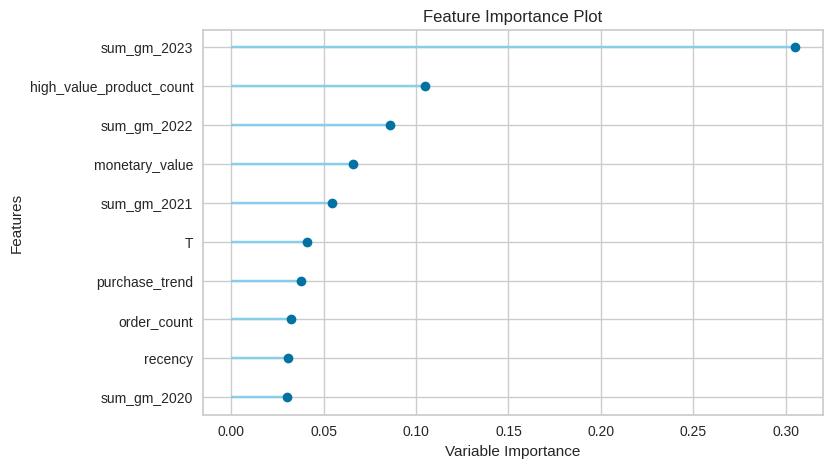

In [ ]:
# plot feature importance
exp_clv.plot_model(model_best_clv, plot = 'feature')

## Predict Best Model On Test Data

In [ ]:
# predict on test set
test_pred_clv = exp_clv.predict_model(model_best_clv)

,Model,MSE,RMSE,R2,WMAPE
0,Extra Trees Regressor,336348704.0142,18339.8120,0.5015,0.6156


In [ ]:
# show predictions df
test_pred_clv.head(10)

,avg_order_value,order_count,avg_days_between_orders,days_since_last_order,unique_product_count,most_frequent_product_NAICSCode,product_variety_score,high_value_product_count,avg_purchase_month,most_common_day_of_week,...,time_to_first_purchase,total_spend_in_early_purchases,early_repeat_purchase,frequency,recency,T,monetary_value,sum_gm_2024,prediction_label,prediction_label_bin
12950,12.332563,32.0,9.0,68.0,69.0,236220.0,2.156250,50.0,2.0,2.0,...,-774,31.080000,True,28.0,774.0,842.0,502.553223,5685.109863,4012.607027,"(1k, 10k)"
13129,14.203175,16.0,14.0,39.0,34.0,999999.0,2.125000,12.0,12.0,0.0,...,-531,71.440002,True,13.0,531.0,570.0,61.090771,213.470001,360.687099,"(0, 1k)"
10009,10.991404,17.0,16.0,16.0,17.0,541330.0,1.000000,9.0,6.0,0.0,...,-431,5.890000,True,12.0,431.0,447.0,103.503334,1231.239990,864.531603,"(0, 1k)"
5202,43.667301,32.0,33.0,25.0,54.0,424690.0,1.687500,64.0,6.0,4.0,...,-2917,1425.420044,True,25.0,2917.0,2942.0,2015.721558,1846.079956,23576.974822,"(10k, 50k)"
487,11.440000,14.0,156.0,676.0,9.0,551112.0,0.642857,12.0,1.0,0.0,...,-2039,331.079987,True,13.0,2039.0,2715.0,157.012314,0.000000,0.000000,NaN
7665,7.436242,513.0,2.0,2.0,241.0,423840.0,0.469786,505.0,1.0,0.0,...,-1463,806.859985,True,323.0,1463.0,1465.0,663.146667,9432.540039,22349.578336,"(10k, 50k)"
7110,20.484501,2.0,257.0,493.0,4.0,324110.0,2.000000,4.0,1.0,1.0,...,-772,281.589996,True,1.0,772.0,1265.0,128.100006,0.000000,0.000000,NaN
7293,136.629166,5.0,156.0,549.0,4.0,999990.0,0.800000,6.0,11.0,4.0,...,-783,1359.099976,True,4.0,783.0,1332.0,730.630005,0.000000,0.000000,NaN
9055,5.437045,29.0,25.0,13.0,2.0,999990.0,0.068966,25.0,3.0,1.0,...,-727,172.899994,True,24.0,727.0,740.0,319.044159,2829.459961,3289.367893,"(1k, 10k)"
7614,25.290648,88.0,18.0,19.0,60.0,423320.0,0.681818,121.0,9.0,1.0,...,-3050,392.970001,True,83.0,3050.0,3069.0,121.631927,844.440002,824.318096,"(0, 1k)"


## Error Analysis on Test Data

### Binning Customers by Gross Margin (GM)

In [ ]:
# Define bin edges and labels
bin_edges = [0, 1000, 10000, 50000, 500000, np.inf]
bin_labels = ['(0, 1k)', '(1k, 10k)', '(10k, 50k)', '(50k, 500k)', '>500k']

# Function to apply bins to a specified column
def apply_bins(df, column_name, new_column_name):
    df[new_column_name] = pd.cut(df[column_name], bins=bin_edges, labels=bin_labels)
    return df

# Apply bins to the 'prediction_label' column in `test_pred_clv`
test_pred_clv = apply_bins(test_pred_clv, 'prediction_label', 'prediction_label_bin')

### Calculate WMAPE for Each Bin

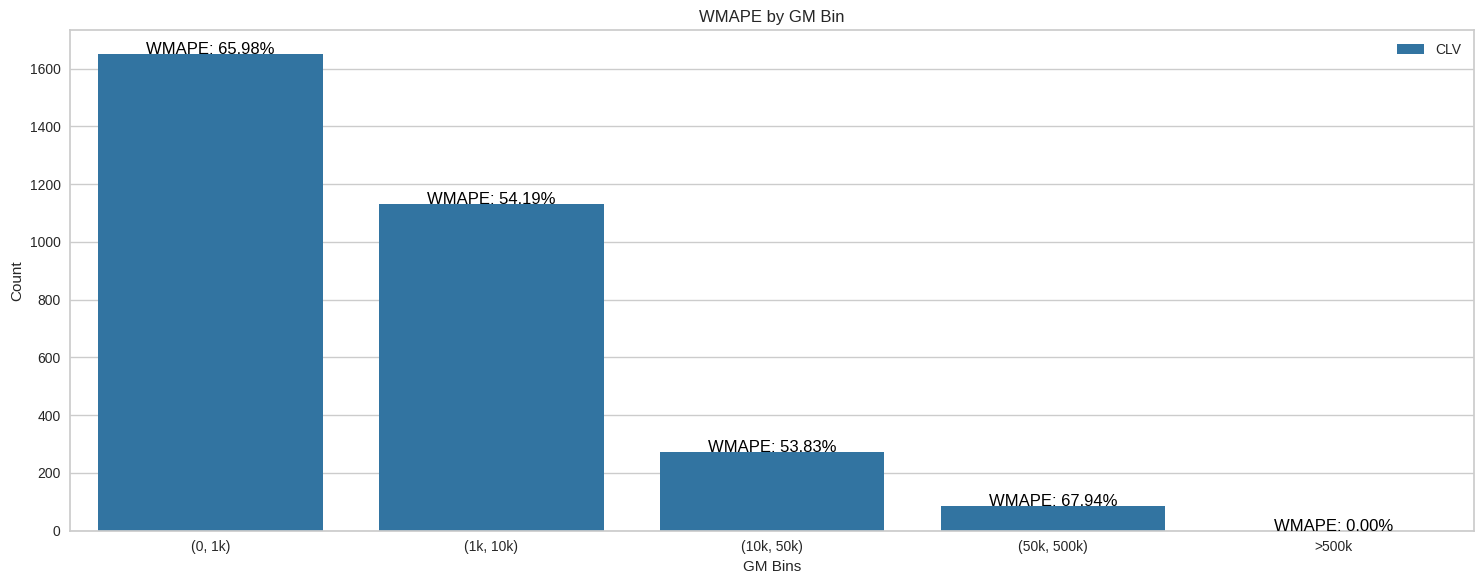

In [ ]:
# Count the number of instances in each bin for plotting
gm_counts = test_pred_clv['prediction_label_bin'].value_counts().reindex(bin_labels).fillna(0)

# Create a DataFrame with GM counts
gm_counts_df = pd.DataFrame({'Bin': gm_counts.index, 'GM': gm_counts.values})

# Step 2: Calculate WMAPE for each bin
def calculate_wmape(actual, predicted):
    return (np.abs(actual - predicted).sum() / actual.sum()) * 100

# Group by bins and calculate WMAPE for each bin
wmape_values = (
    test_pred_clv.groupby('prediction_label_bin')
    .apply(lambda x: calculate_wmape(x['sum_gm_2024'], x['prediction_label']) if len(x) > 0 else 0)
)

# Merge WMAPE values into the `gm_counts_df`
gm_counts_df['WMAPE'] = wmape_values.values

# Step 3: Plotting using Seaborn
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=gm_counts_df, x='Bin', y='GM', color='#1f77b4', label='CLV')

# Add WMAPE labels on the bars
for i, (wmape, GM) in enumerate(zip(gm_counts_df['WMAPE'], gm_counts_df['GM'])):
    ax.text(i, GM + 0.5, f'WMAPE: {wmape:.2f}%', ha='center', color='black')

plt.title('WMAPE by GM Bin')
plt.xlabel('GM Bins')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()